#### Project Plots

In [1]:
import numpy as np
import nolds
from matplotlib import pyplot as plt
from numpy import linalg as la
import os
from scipy import stats
from scipy import spatial as sp
from scipy import sparse
from sklearn import linear_model
from scipy import linalg as sla

import lyapynov as le

import pandas as pd
import networkx as nx

import SystemsSolved as s
import Methods as m

import Sparse_Reservoir_Computing as rc

import RecurrencePlotsCode as rp

import multiprocess as mp

In [2]:
R = s.rossler(a=0.2, b=0.2, c=5.7)
Rts = R.solve(t0=0, tFinal=1000, x0 = [-1.5, -1.5, 10], dt=0.01)

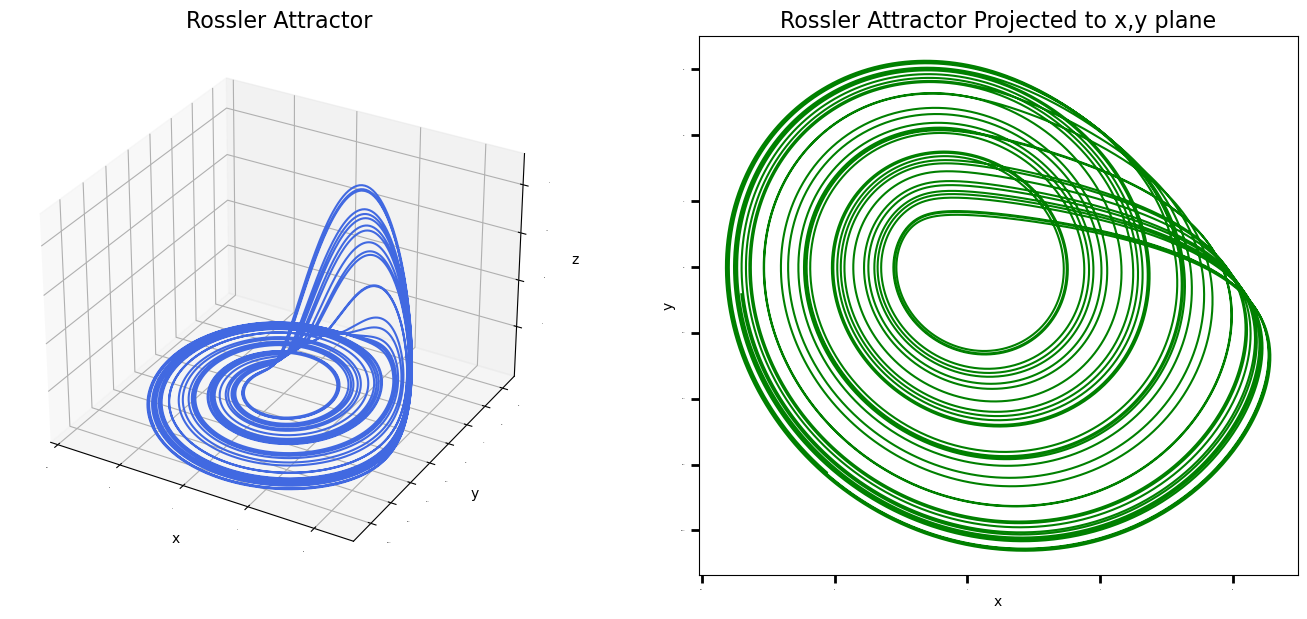

In [4]:
p1 = m.plot3D(cols=2, rows=1, figsize=(17, 7))
p1.plot3D(Rts[:, 10000:30000], plotNum=1, tick_label_color='k', title="Rossler Attractor", title_font_size=16, tick_label_size=0)
p1.plot2D(Rts[0, 10000:30000], Rts[1, 10000:30000], plotNum=2, title="Rossler Attractor Projected to x,y plane", title_font_size=16, tick_label_size=0)
plt.savefig("OutputGraphics\\PhaseCoherent_Choas.svg")

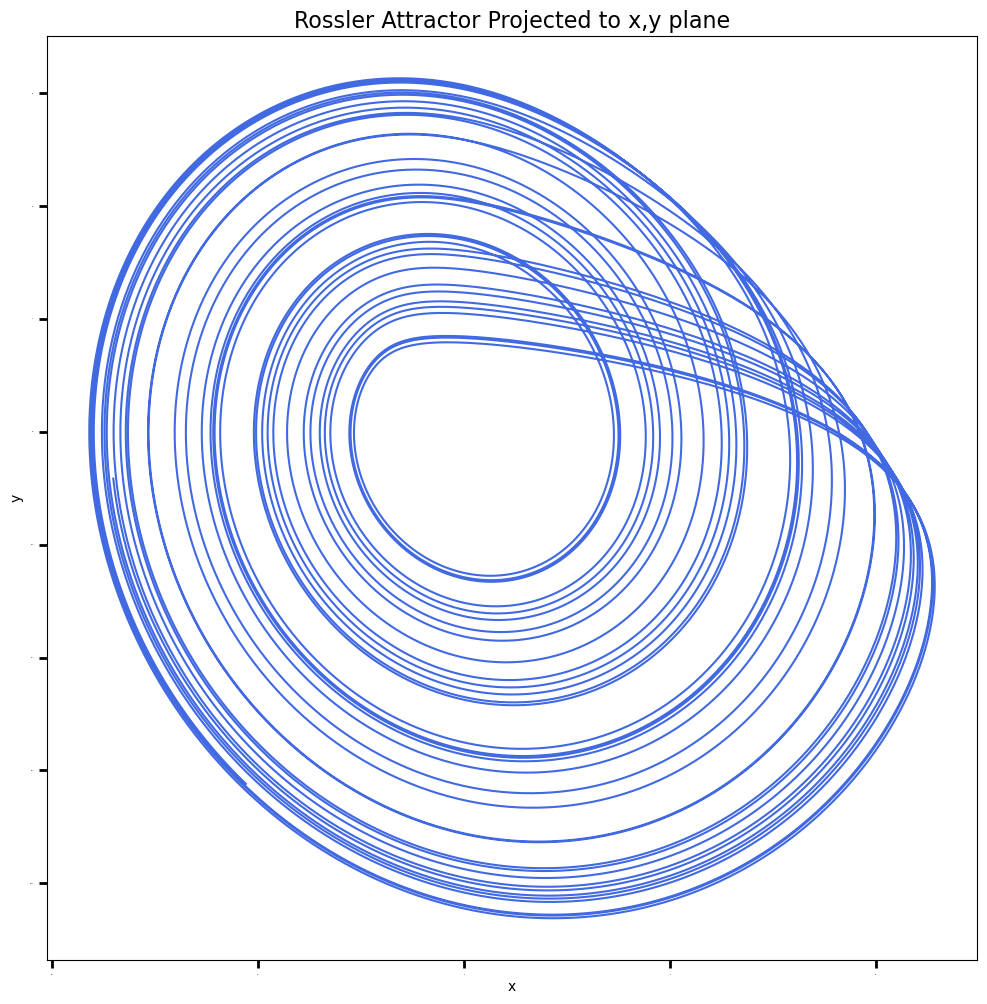

In [8]:
p1 = m.plot3D(cols=1, rows=1, figsize=(12, 12))
p1.plot2D(Rts[0, 10000:30000], Rts[1, 10000:30000], plotNum=1, title="Rossler Attractor Projected to x,y plane", title_font_size=16, tick_label_size=0)
plt.savefig("OutputGraphics\\RosslerCycle_Choas.svg")

In [ ]:
###

### Levels of coupling

In [167]:
mu = 0.005
nu = 0.02

Ry0 = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
Ry_ts0 = Ry0.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

#Splits ts and removes transient time 
A0 = Ry_ts0[0:3, :] 
B0 = Ry_ts0[3:6, :] 

###########################################
mu = 0.04
nu = 0.02

Ry1 = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
Ry_ts1 = Ry1.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

#Splits ts and removes transient time 
A1 = Ry_ts1[0:3, :] 
B1 = Ry_ts1[3:6, :] 

############################################
mu = 0.1
nu = 0.02

Ry2 = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
Ry_ts2 = Ry2.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

#Splits ts and removes transient time 
A2 = Ry_ts2[0:3, :] 
B2 = Ry_ts2[3:6, :] 



In [ ]:
start_pts = 82000
end_pts = 86000
Time = np.linspace(820, 860, 4000)

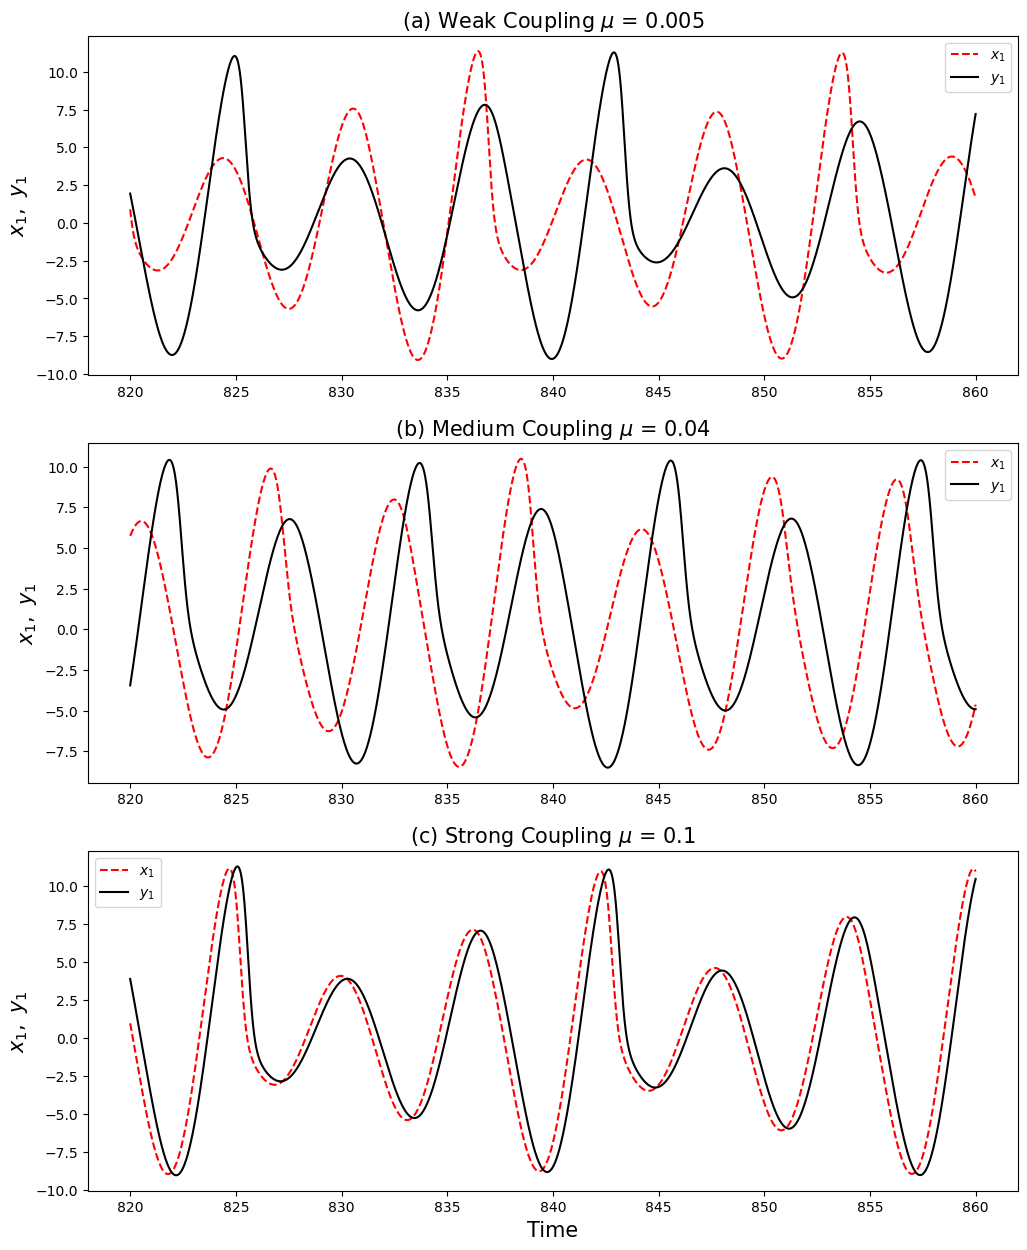

In [176]:

fig = plt.figure(figsize=(12, 15))

#Setting plot attributes
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_title("(a) Weak Coupling " + r'$\mu$' + " = 0.005", fontsize=15)
ax1.set_ylabel(r'$x_1, \ y_1$', fontsize=15)
#ax1.set_xlabel("time", fontsize=10)

#Plotting 
plt.plot(Time, A0[0, start_pts:end_pts], linestyle = "--", color='r', label=r'$x_{1}$')
plt.plot(Time, B0[0, start_pts:end_pts], linestyle = "-", color='k', label=r'$y_{1}$')
plt.legend()
####################################



#Setting plot attributes
ax2 = fig.add_subplot(3, 1, 2, sharex=ax1)
ax2.set_title("(b) Medium Coupling " + r'$\mu$' + " = 0.04", fontsize=15)
ax2.set_ylabel(r'$x_1, \ y_1$', fontsize=15)
#ax2.set_xlabel("time", fontsize=10)

#Plotting 
plt.plot(Time, A1[0, start_pts:end_pts], linestyle = "--", color='r', label=r'$x_{1}$')
plt.plot(Time, B1[0, start_pts:end_pts], linestyle = "-", color='k', label=r'$y_{1}$')
plt.legend()
#########################################


#Setting plot attributes
ax3 = fig.add_subplot(3, 1, 3, sharex=ax1)
ax3.set_title("(c) Strong Coupling " + r'$\mu$' + " = 0.1", fontsize=15)
ax3.set_ylabel(r'$x_{1}, \ y_{1}$', fontsize=15)
ax3.set_xlabel("Time", fontsize=15)

#Plotting 
plt.plot(Time, A2[0, start_pts:end_pts], linestyle = "--", color='r', label=r'$x_{1}$')
plt.plot(Time, B2[0, start_pts:end_pts], linestyle = "-", color='k', label=r'$y_{1}$')
plt.legend()

plt.savefig("OutputGraphics\\Rossler_Coupling.svg")



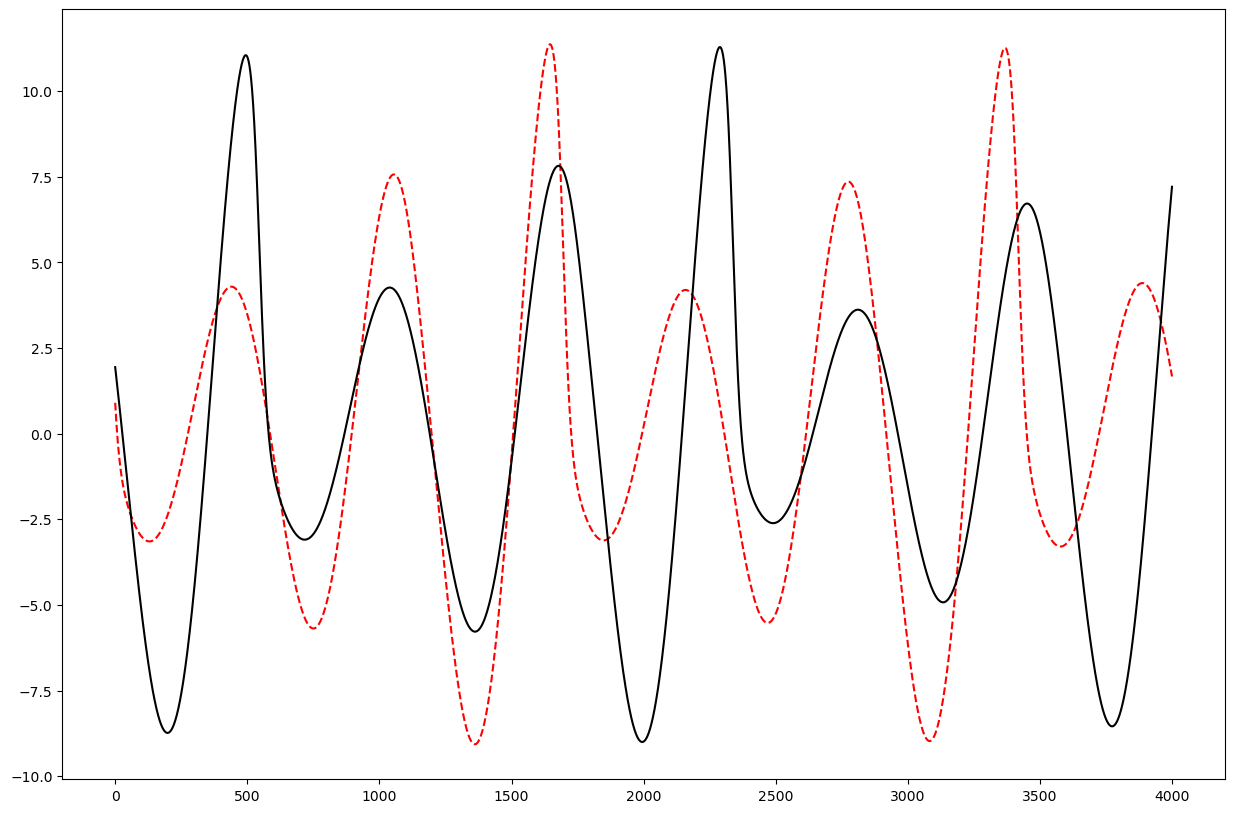

In [170]:
plt.figure(figsize=(15, 10))
plt.plot(A0[0, start_pts:end_pts], linestyle = "--", color='r', label='B')
plt.plot(B0[0, start_pts:end_pts], linestyle = "-", color='k')

In [6]:
def PStest_Rossler_Mutual(mu = 0):
    import SystemsSolved as s
    import Methods as m
    mu = mu
    nu = 0.02
    Ry = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
    Ry_ts = Ry.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

    #Splits ts and removes transient time 
    A0 = Ry_ts[0:3, :]; B0 = Ry_ts[3:6, :] 

    #Setting indices 
    tStart = 700; tEnd = 800; dt = 0.01
    iStart = int(tStart/dt); iEnd = int(tEnd/dt)  #Discarding beginning of time series 

    return m.PSstat1(A0[:, iStart:iEnd], B0[:, iStart:iEnd])

In [ ]:
mu_pts = np.linspace(0, 0.1, 200)
with mp.Pool(processes=6) as pool:
        results = pool.map(PStest_Rossler_Mutual, mu_pts)


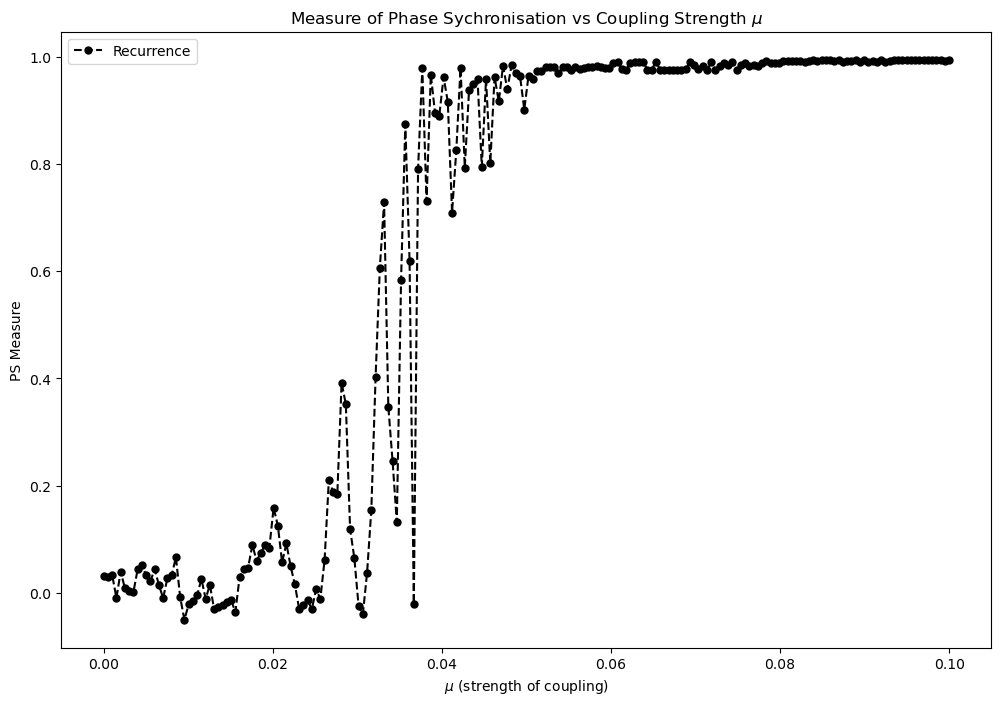

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(mu_pts, results, linestyle='--', marker='o',markersize='5', color='k', label="Recurrence")
plt.xlabel(r'$\mu$' + " (strength of coupling)")#
plt.ylabel("PS Measure")
plt.title("Measure of Phase Sychronisation vs Coupling Strength "+r'$\mu$')

plt.legend()
plt.savefig("OutputGraphics\\PSvCoupling1.svg")

### Recurrence Probability



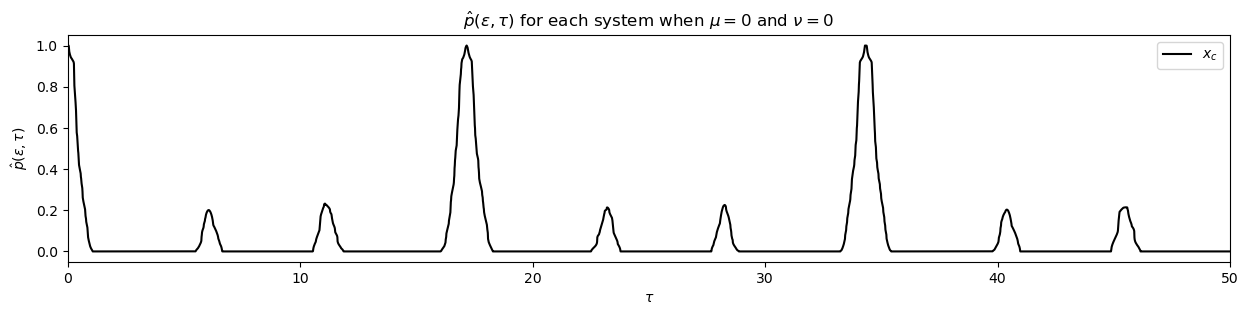

In [ ]:
mu = 0.00
nu = 0.02

Ry = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
Ry_ts = Ry.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

#Splits ts and removes transient time 
A0 = Ry_ts[0:3, :] 
B0 = Ry_ts[3:6, :] 

#Setting for Phase Synchronisation 
#Measuring Synchronisation between A and B (real systems) T=700 - 900
A0_t = A0[:, 70000:80000] 
B0_t = B0[:, 70000:80000]
#Getting Measure of Synchronisation
RM_A0 = rp.RecurrenceMatrix(A0_t, p = 2, tol = 3)
#RM_B0 = rp.RecurrenceMatrix(B0_t, p = 2, tol = 3) #Recurrence Matrices for each 

#Class to calculate properties from recurrence matrices 
a0 = rp.recurrence_functions(RM_A0)
#b0 = rp.recurrence_functions(RM_B0) 

#Probability of recurrence after tau for every tau. 
p_a0 = a0.p_tau_dist()
#p_b0 = b0.p_tau_dist()

tau = np.linspace(0, 100, 10000)
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(3, 1, 2)

plt.plot(tau, p_a0, color='k', label=r'$x_c$')
#plt.plot(tau, p_b0, linestyle = "--", color='r', label='B')
plt.title("A:" + r'$\hat{p}(\epsilon, \tau)$' + " vs " + r'$\mu = 0$' + " and " + r'$\nu = 0$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\hat{p}(\epsilon, \tau)$')
plt.xlim(0, 50)
plt.legend()
#t_stat = stats.pearsonr(p_a0,p_b0).statistic
#print(t_stat)
plt.savefig("OutputGraphics\\Recurr_prob.svg")

In [39]:
mu = 0.01
nu = 0.02

Ry = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
Ry_ts = Ry.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

#Splits ts and removes transient time 
A1 = Ry_ts[0:3, :] 
B1 = Ry_ts[3:6, :] 

#Setting for Phase Synchronisation 
#Measuring Synchronisation between A and B (real systems) T=700 - 900
A1_t = A1[:, 70000:80000] 
B1_t = B1[:, 70000:80000]
#Getting Measure of Synchronisation
RM_A1 = rp.RecurrenceMatrix(A1_t, p = 2, tol = 3)
RM_B1 = rp.RecurrenceMatrix(B1_t, p = 2, tol = 3) #Recurrence Matrices for each 

#Class to calculate properties from recurrence matrices 
a1 = rp.recurrence_functions(RM_A1)
b1 = rp.recurrence_functions(RM_B1) 

#Probability of recurrence after tau for every tau. 
p_a1 = a1.p_tau_dist()
p_b1 = b1.p_tau_dist()

In [42]:
mu = 0.00
nu = 0.00

Ry = s.yCoupledRossler(a = 0.2, b = 0.2, c = 5.7, nu1 = nu, mu1 = mu, nu2 = nu, mu2 = mu)
Ry_ts = Ry.solve(t0 = 0, tFinal = 1000, x0_1 = [-1.5, 1.5, 20], x0_2 = [-1, -1, 10], dt = 0.01)

#Splits ts and removes transient time 
A2 = Ry_ts[0:3, :] 
B2 = Ry_ts[3:6, :] 

#Setting for Phase Synchronisation 
#Measuring Synchronisation between A and B (real systems) T=700 - 900
A2_t = A2[:, 70000:80000] 
B2_t = B2[:, 70000:80000]
#Getting Measure of Synchronisation
RM_A2 = rp.RecurrenceMatrix(A2_t, p = 2, tol = 3)
RM_B2 = rp.RecurrenceMatrix(B2_t, p = 2, tol = 3) #Recurrence Matrices for each 

#Class to calculate properties from recurrence matrices 
a2 = rp.recurrence_functions(RM_A2)
b2 = rp.recurrence_functions(RM_B2) 

#Probability of recurrence after tau for every tau. 
p_a2 = a2.p_tau_dist()
p_b2 = b2.p_tau_dist()

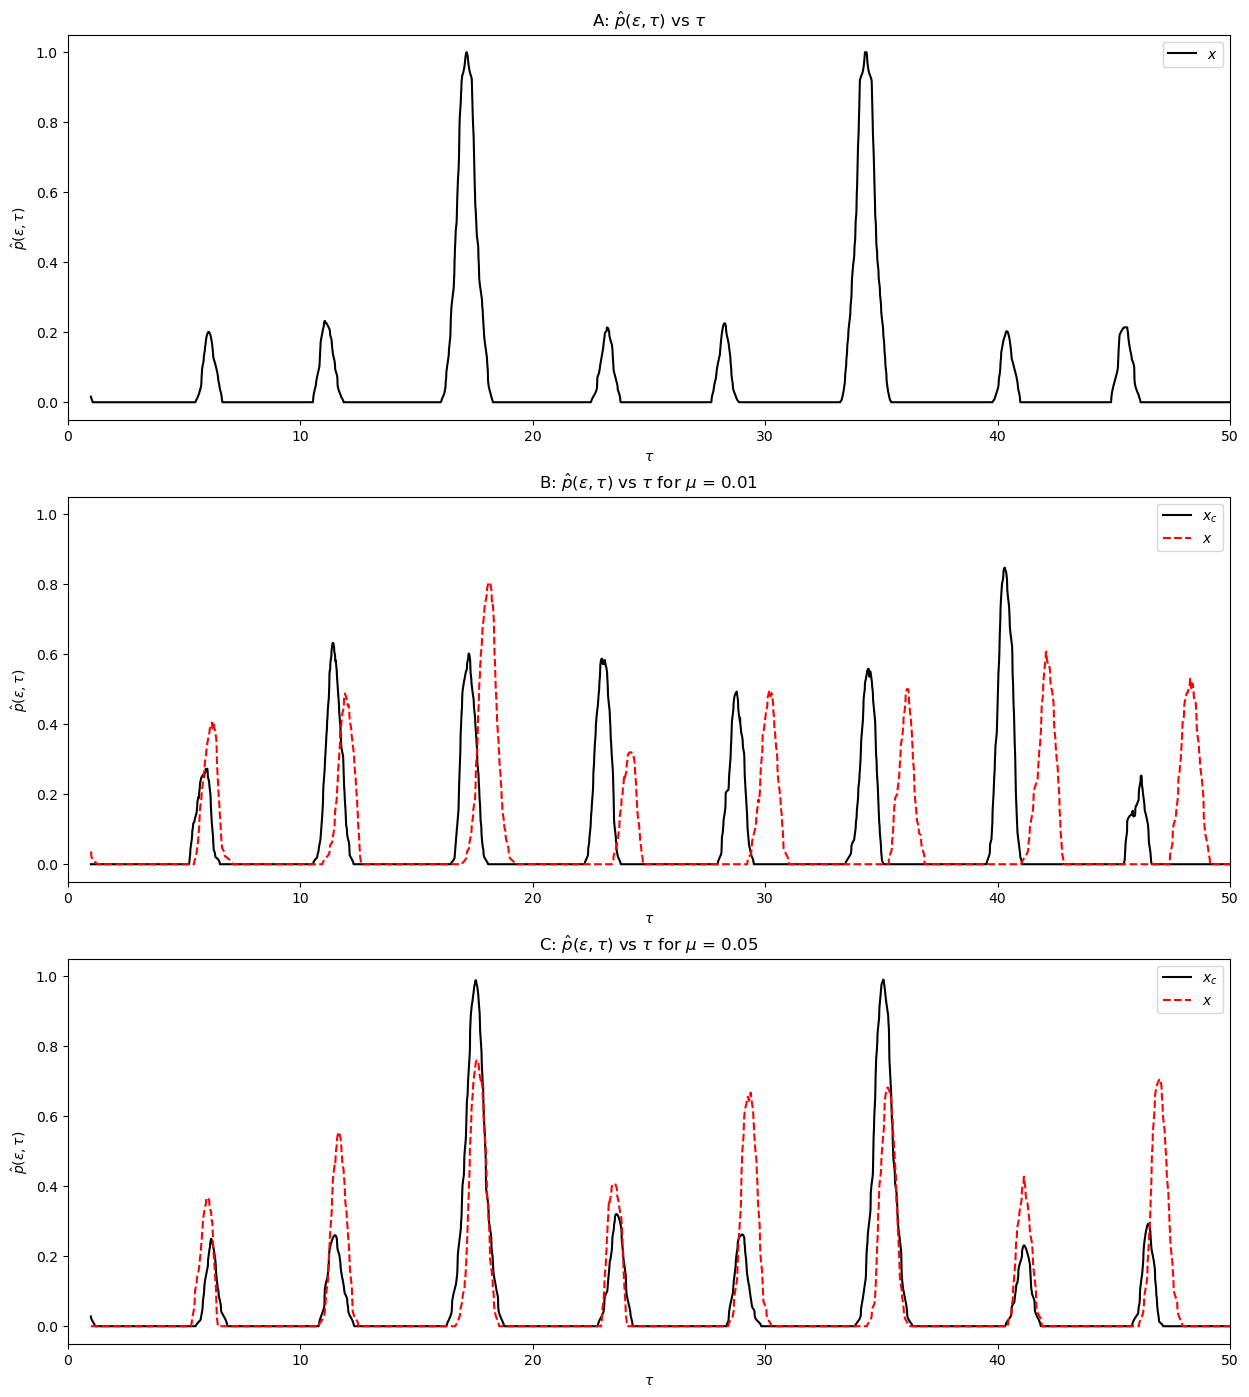

In [43]:
tau = np.linspace(0, 100, 10000)
fig = plt.figure(figsize=(15, 17))


#Plot 1 
fig.add_subplot(3, 1, 1)
plt.plot(tau[100:], p_a0[100:], color='k', label=r'$x$')
#plt.plot(tau, p_b0, linestyle = "--", color='r', label='B')
plt.title("A: " + r'$\hat{p}(\epsilon, \tau)$' + " vs " + r'$\tau$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\hat{p}(\epsilon, \tau)$')
plt.xlim(0, 50)
plt.legend()



#Plot 2
fig.add_subplot(3, 1, 2)
plt.plot(tau[100:], p_a1[100:], color='k', label=r'$x_c$')
plt.plot(tau[100:], p_b1[100:], linestyle = "--", color='r', label=r'$x$')
plt.title("B: " + r'$\hat{p}(\epsilon, \tau)$' + " vs " + r'$\tau$' + " for " + r'$\mu$' + " = 0.01")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\hat{p}(\epsilon, \tau)$')
plt.xlim(0, 50)
plt.legend()

#Plot 2
fig.add_subplot(3, 1, 3)
plt.plot(tau[100:], p_a2[100:], color='k', label=r'$x_c$')
plt.plot(tau[100:], p_b2[100:], linestyle = "--", color='r', label=r'$x$')
plt.title("C: " + r'$\hat{p}(\epsilon, \tau)$' + " vs " + r'$\tau$' + " for " + r'$\mu$' + " = 0.05")
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\hat{p}(\epsilon, \tau)$')
plt.xlim(0, 50)
plt.legend()

plt.savefig("OutputGraphics\\Recurr_prob.svg")



In [ ]:
plt.imshow()